![logo](../.././docs/images/Logo_Destination_Earth_Colours.png)

## Polytope nextGEMS historical bounding box example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull nextGEMS data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [2]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [3]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [1]:
import earthkit.data
import earthkit.plots
import earthkit.geo.cartography
from polytope.api import Client

In [2]:
countries = ["Spain"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    'class':'ng',
    'activity':'cmip6',
    'experiment':'hist',
    'generation':'1',
    'model':'ifs-fesom',
    'realization':'1',
    'expver':'0001',
    'stream':'clte',
    'resolution':'high',
    'type':'fc',
    'levtype':'sfc',
    'date':'20000101',
    'param':'167',
    'time':'0000',
    "feature": {
        "type": "polygon",
        "shape": shapes
    },
}

In [ ]:
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)

In [4]:
ds = data.to_xarray()
ds

<xarray.Dataset> Size: 125kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 3117)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2000-01-01 00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 25kB 0 1 2 3 4 5 ... 3111 3112 3113 3114 3115 3116
    latitude   (points) float64 25kB 27.78 27.78 27.87 ... 43.61 43.71 43.71
    longitude  (points) float64 25kB 342.0 344.4 344.4 ... 354.3 352.2 352.4
    levelist   (points) float64 25kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    2t         (datetimes, number, steps, points) float64 25kB 287.8 ... 278.1
Attributes: (12/14)
    activity:     cmip6
    class:        ng
    experiment:   hist
    expver:       0001
    generation:   1
    levtype:      sfc
    ...           ...
    resolution:   high
    stream:       clte
    type:         fc
    number:       0
    step:         0
    date:         2000-01-01 00:00:00Z

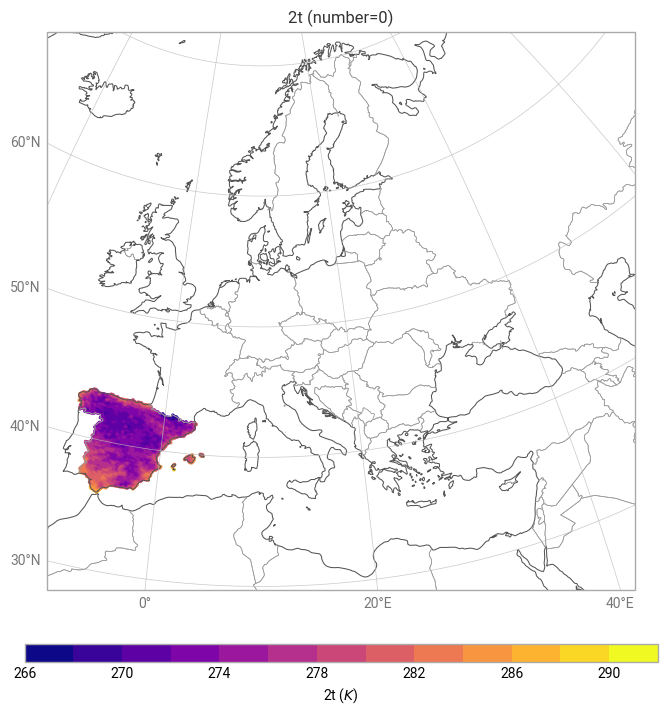

In [5]:
chart = earthkit.plots.Map(domain="Europe")
chart.point_cloud(ds['2t'], x="longitude", y="latitude")

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()